# Project Reinforcement Learning for Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Model Description

In [2]:
MAX_VM = 3       # Maximum number of VMs
SYS_CAPACITY = 3 # System capacity (maximum number of clients)
FLOW_RATE = 5    # Flow rate

P_A = [0.2, 0.4, 0.3, 0.1] # Probability distribution of paquets arrival

RUNNING_COST = 1      # Cost of a running VM
ACTIVATION_COST = 1   # Cost of the activation of a VM
DEACTIVATION_COST = 1 # Cost of deactivation of a VM
HOST_COST = 1         # Cost of hosting a client

NB_STATES = (SYS_CAPACITY + 1) * (MAX_VM + 1) # Total number of states
NB_ACTIONS = MAX_VM + 1                       # Total number of actions

In [3]:
def cost(state, action):
    """
    Cost induced by realising a given action while being in a given state.
    In ou study it is a financial cost that we seek to minimise.

    Parameters
    ----------
    state : Tuple[int, int]
        State of the system (number of clients currently in the system
        (queue or VMs) and the current number of running VMS).
    action : int
        Action (number of VMs to keep running).

    Returns
    -------
    float
        Cost
    """
    clients, servers = state

    c = 0
    c += action * RUNNING_COST
    c += (action - servers) * ACTIVATION_COST if action > servers else 0
    c += (servers - action) * DEACTIVATION_COST if action < servers else 0
    # c += clients * HOST_COST
    c += (clients - action) * HOST_COST if clients > action else 0

    return c 

In [4]:
def state_to_index(state):
    clients, servers = state
    index = clients * NB_ACTIONS + servers
    return index

In [5]:
def index_to_state(index):
    clients = index // NB_ACTIONS
    servers = index % NB_ACTIONS
    return clients, servers

In [6]:
def results_plot(policy, min_Q_values, nb_episodes, title, path):
    fig, ax = plt.subplots(2,1, height_ratios=[3,1])
    fig.tight_layout()
    # fig.suptitle(title)
    
    ax[0].plot(range(0, nb_episodes), min_Q_values)
    ax[0].set_xlabel("Episode")
    ax[0].set_ylabel("Minimum de la matrice Q")
    ax[0].set_title(title)

    ax[1].set_axis_off()
    row_labels = [f"{i} clients" for i in range(SYS_CAPACITY + 1)]
    col_labels = [f"{i} VMs" for i in range(MAX_VM + 1)]
    cell_text = np.zeros((SYS_CAPACITY + 1, MAX_VM + 1), dtype=np.int32)
    for index, action in enumerate(policy):
        clients, servers = index_to_state(index)
        cell_text[clients, servers] = action

    table = ax[1].table(
        cellText=cell_text,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc="center",
        rowColours=["lightblue"] * (SYS_CAPACITY + 1),
        colColours=["lightblue"] * (MAX_VM + 1),
        loc="center"
    )
    
    plt.savefig(path, bbox_inches="tight")
    plt.show()

In [7]:
# Transition matrix
transition_matrix = np.zeros((NB_STATES, NB_ACTIONS, NB_STATES))

# Iterate over states
for s in range(NB_STATES):
    m, n = index_to_state(s)

    # Iterate over actions
    for j in range(MAX_VM + 1):
        
        # Iterate over packet arrivals
        for i in range(len(P_A)):
            
            # Compute new state
            new_m = min(SYS_CAPACITY, max(0, m + i - j * FLOW_RATE))
            new_s = state_to_index((new_m, j))

            # Update transition matrix
            # Update probability of arriving in state new_s
            # when choosing action j from state s
            transition_matrix[s, j, new_s] += P_A[i]

print(transition_matrix.shape)
print(transition_matrix)

(16, 4, 16)
[[[0.2 0.  0.  ... 0.  0.  0. ]
  [0.  1.  0.  ... 0.  0.  0. ]
  [0.  0.  1.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 [[0.2 0.  0.  ... 0.  0.  0. ]
  [0.  1.  0.  ... 0.  0.  0. ]
  [0.  0.  1.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 [[0.2 0.  0.  ... 0.  0.  0. ]
  [0.  1.  0.  ... 0.  0.  0. ]
  [0.  0.  1.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 ...

 [[0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.9 0.  ... 0.  0.  0. ]
  [0.  0.  1.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 [[0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.9 0.  ... 0.  0.  0. ]
  [0.  0.  1.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 [[0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.9 0.  ... 0.  0.  0. ]
  [0.  0.  1.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]]


In [8]:
# Check if transition matrix is correct
# When choosing action j from state s, we should
# arrive in a new state with a probability of 1
check = np.sum(transition_matrix, axis=2)
print(check.shape)
print(check)

(16, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


## Q-Value

In [9]:
def Q_Value(transition_matrix, epsilon=1e-3, gamma=0.1):

    # Initialise Q_n and Q_nn
    Q_n = np.zeros((NB_STATES, NB_ACTIONS))
    Q_nn = np.zeros((NB_STATES, NB_ACTIONS))

    # Initialise list of Q minimums
    min_Q_values = []

    # Initialise "episode" counter
    nb_episodes = 0

    # Repeat until convergence
    while nb_episodes == 0 or np.sum(Q_nn - Q_n) > epsilon:

        # Update Q_n
        Q_n = np.copy(Q_nn)

        # Iterate over states
        for s in range(NB_STATES):

            # Iterate over actions
            for j in range(NB_ACTIONS):

                # Compute cost
                r = cost(index_to_state(s), j)

                # Compute sum in Bellmann equation
                sum = 0
                prob = transition_matrix[s, j, :] # Probabilities to arrive in every other state from state s with action j
                for ss in range(NB_STATES):
                    sum += prob[ss] * np.min(Q_n[ss, :])

                # Update Q_nn
                Q_nn[s, j] = r + gamma * sum

        # Save minimum from Q
        min_Q_value = np.min(Q_nn)
        min_Q_values.append(min_Q_value)

        # Increment episode counter                    
        nb_episodes += 1

    # Compute policy
    policy = np.argmin(Q_nn, axis=1)

    return policy, Q_nn, min_Q_values, nb_episodes

In [14]:
epsilon_QV = 1e-6
gamma_QV = 0.9
policy_QV, Q_QV, min_Q_values_QV, nb_episodes_QV = Q_Value(transition_matrix,
                                                           epsilon_QV, gamma_QV)

In [15]:
title_QV = "Q-Value\n" rf"$\epsilon =$ {epsilon_QV}, $\gamma =$ {gamma_QV}"
path_QV = f"plots/Q_value_{epsilon_QV}_{gamma_QV}.jpg"

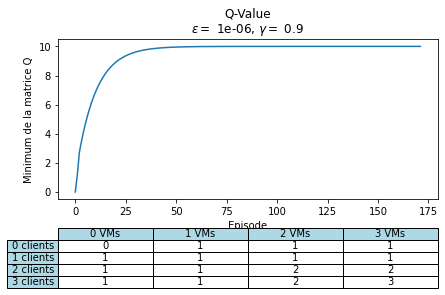

In [16]:
results_plot(policy_QV, min_Q_values_QV, nb_episodes_QV, title_QV, path_QV)

## Q-Learning

In [10]:
def Q_Learning(transition_matrix, nb_episodes=1000, max_steps=1000, epsilon=0.1, gamma=0.9, alpha=0.9):
    
    # Initialise Q
    Q = np.zeros((NB_STATES, NB_ACTIONS))
    
    # Initialise list of Q minimums
    min_Q_values = []

    # Iterate over episode
    for e in range(nb_episodes):
        
        # Initialise state
        s = np.random.randint(0, NB_STATES)
        
        # Initialise step counter
        nb_steps = 0

        # Repeat for a fixed amount of steps
        # (Because there is no terminal state)
        while nb_steps < max_steps:

            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                j = np.random.randint(0, NB_ACTIONS)  # Explore
            else:
                j = np.argmin(Q[s])  # Exploit

            # Compute new state
            new_s = np.argmax(transition_matrix[s, j, :])

            # Compute cost
            r = cost(index_to_state(s), j)
            
            # Update Q
            Q[s, j] += alpha * (r + gamma * np.min(Q[new_s, :]) - Q[s, j])
            
            # Update state
            s = new_s
            
            # Increment step counter
            nb_steps += 1
            
        # Save minimum from Q
        min_Q_value = np.min(Q)
        min_Q_values.append(min_Q_value)
            
    # Compute policy
    policy = np.argmin(Q, axis=1)
        
    return policy, Q, min_Q_values

In [11]:
nb_episodes_QL = 5000
max_steps_QL = 500
epsilon_QL = 0.1
gamma_QL = 0.9
alpha_QL = 0.1
policy_QL, Q_QL, min_Q_values_QL = Q_Learning(transition_matrix,
                                              nb_episodes_QL, max_steps_QL,
                                              epsilon_QL, gamma_QL, alpha_QL)

In [34]:
title_QL = "Q-Learning\n" rf"nb_episodes = {nb_episodes_QL}, max_steps = {max_steps_QL}, $\epsilon =$ {epsilon_QL}, $\gamma =$ {gamma_QL}, $\alpha =$ {alpha_QL}"
path_QL = f"plots/Q_learning_{nb_episodes_QL}_{max_steps_QL}_{epsilon_QL}_{gamma_QL}_{alpha_QL}.jpg"

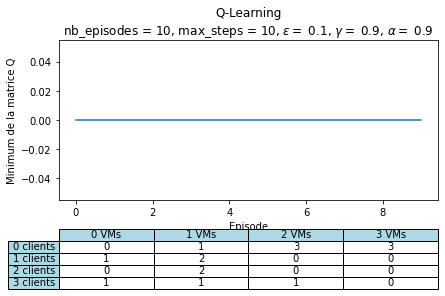

In [35]:
results_plot(policy_QL, min_Q_values_QL, nb_episodes_QL, title_QL, path_QL)

## Sarsa

In [36]:
def SARSA(transition_matrix, nb_episodes=1000, max_steps=1000, epsilon=0.1, gamma=0.9, alpha=0.9):
    
    # Initialise Q
    Q = np.zeros((NB_STATES, NB_ACTIONS))
    
    # Initialise list of Q minimums
    min_Q_values = []

    # Iterate over episodes
    for e in range(nb_episodes):
        
        # Initialize state
        s = np.random.randint(0, NB_STATES)

        # Initialise action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            j = np.random.randint(0, NB_ACTIONS)  # Explore
        else:
            j = np.argmin(Q[s])  # Exploit

        # Initialise step counter
        nb_steps = 0

        # Repeat for a fixed amount of steps
        # (Because there is no terminal state)
        while nb_steps < max_steps:

            # Compute new state
            new_s = np.argmin(transition_matrix[s, j, :])

            # Compute cost
            r = cost(index_to_state(s), j)

            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                new_j = np.random.randint(0, NB_ACTIONS)  # Explore
            else:
                new_j = np.argmin(Q[s])  # Exploit

            # Update Q
            Q[s, j] += alpha * (r + gamma * Q[new_s, new_j] - Q[s, j])

            # Update state and action
            s = new_s
            j = new_j

            # Increment step counter
            nb_steps += 1

        # Save minimum from Q
        min_Q_value = np.min(Q)
        min_Q_values.append(min_Q_value)
            
    # Compute policy
    policy = np.argmin(Q, axis=1)
        
    return policy, Q, min_Q_values

In [46]:
nb_episodes_S = 5000
max_steps_S = 500
epsilon_S = 0.1
gamma_S = 0.9
alpha_S = 0.1
policy_S, Q_S, min_Q_values_S = SARSA(transition_matrix,
                                      nb_episodes_S, max_steps_S,
                                      epsilon_S, gamma_S, alpha_S)

In [47]:
title_S = "SARSA\n" rf"nb_episodes = {nb_episodes_S}, max_steps = {max_steps_S}, $\epsilon =$ {epsilon_S}, $\gamma =$ {gamma_S}, $\alpha =$ {alpha_S}"
path_S = f"plots/SARSA_{nb_episodes_S}_{max_steps_S}_{epsilon_S}_{gamma_S}_{alpha_S}.jpg"

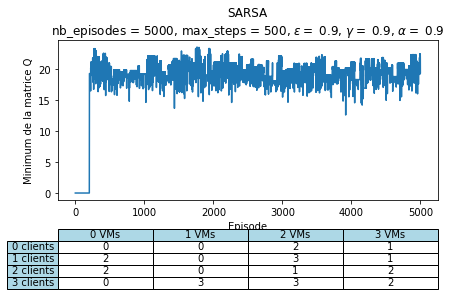

In [48]:
results_plot(policy_S, min_Q_values_S, nb_episodes_S, title_S, path_S)

## Q-Learning with $\alpha$-decay

In [12]:
def Q_Learning_decay(transition_matrix, nb_episodes=1000, max_steps=1000, epsilon=0.1, gamma=0.9, alpha_init=1.0):
    
    # Initialise Q
    Q = np.zeros((NB_STATES, NB_ACTIONS))

    # Initialise action_counter and alpha
    action_counter = np.zeros((NB_STATES, NB_ACTIONS))
    alpha = np.ones((NB_STATES, NB_ACTIONS)) * alpha_init
    
    # Initialise list of Q minimums
    min_Q_values = []

    # Iterate over episode
    for e in range(nb_episodes):
        
        # Initialise state
        s = np.random.randint(0, NB_STATES)
        
        # Initialise step counter
        nb_steps = 0

        # Repeat for a fixed amount of steps
        # (Because there is no terminal state)
        while nb_steps < max_steps:

            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                j = np.random.randint(0, NB_ACTIONS)  # Explore
            else:
                j = np.argmin(Q[s])  # Exploit

            # Compute new state
            new_s = np.argmax(transition_matrix[s, j, :])

            # Compute cost
            r = cost(index_to_state(s), j)
            
            # Update Q
            Q[s, j] += alpha[s, j] * (r + gamma * np.min(Q[new_s, :]) - Q[s, j])

            # Update action_counter and alpha
            action_counter[s, j] += 1
            alpha[s, j] = 1 / action_counter[s, j]
            
            # Update state
            s = new_s
            
            # Increment step counter
            nb_steps += 1
            
        # Save minimum from Q
        min_Q_value = np.min(Q)
        min_Q_values.append(min_Q_value)
            
    # Compute policy
    policy = np.argmin(Q, axis=1)
        
    return policy, Q, min_Q_values

In [13]:
nb_episodes_QL_decay = nb_episodes_QL
max_steps_QL_decay = max_steps_QL
epsilon_QL_decay = epsilon_QL
gamma_QL_decay = gamma_QL
alpha_QL_decay = 0.9
policy_QL_decay, Q_QL_decay, min_Q_values_QL_decay = Q_Learning_decay(transition_matrix,
                                                                      nb_episodes_QL_decay, max_steps_QL_decay,
                                                                      epsilon_QL_decay, gamma_QL_decay, alpha_QL_decay)

In [14]:
title_QL_decay = r"Q-Learning with $\alpha$-decay" "\n" rf"nb_episodes = {nb_episodes_QL_decay}, max_steps = {max_steps_QL_decay}, $\epsilon =$ {epsilon_QL_decay}, $\gamma =$ {gamma_QL_decay}, $\alpha =$ {alpha_QL_decay}"
path_QL_decay = f"plots/Q_learning_decay_{nb_episodes_QL_decay}_{max_steps_QL_decay}_{epsilon_QL_decay}_{gamma_QL_decay}_{alpha_QL_decay}.jpg"

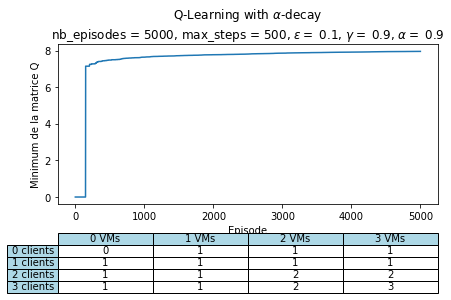

In [15]:
results_plot(policy_QL_decay, min_Q_values_QL_decay, nb_episodes_QL_decay, title_QL_decay, path_QL_decay)